# Potencial eléctrico y campo: La ecuación de Laplace

* Prof. Esteban Pérez Hidalgo
* Física Computacional I I-2024

En regiones del espacio que no contienen carga eléctrica, 
el potencial eléctrico $V(x,y,z)$ obedece la ecuación de Laplace:
    
$$
\vec \nabla^2 \cdot V = 0    
$$

o de forma explícita:

$$
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = 0
$$

## Condiciones de frontera

<div>
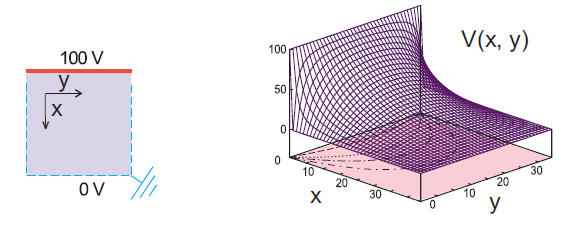
</div>

- La ecuación de Laplace generalmente se resuelve dadas ciertas condiciones de frontera:
    - Valores de $V$ para ciertos puntos del espacio.
    - Valores de $E$ ($\vec \nabla V$) en ciertos puntos del espacio.
- El objetivo es encontrar una función $V(x,y,z)$ que cumpla con las condiciones de frontera y satisfaga la ecuación de Laplace.

## Métodos de solución EDP

- Las EDP no tienen un métodos numéricos "multipropósito" (tipo RK4) para obtener soluciones.
- Existen varios algoritmos de solución, pero solo aplican para cierta clase de EDPs
- En particular, la Ec de Laplace puede resolverse numéricamente aplicando el método de separación de variables y para luego aplicar series de Fourier.
- Para el caso de una EDP elíptica, puede usarse también el método de relajación.

### Discusión sobre método de elemento finito y método de diferencias finitas en Reitz $\S$ 3.12

## Solución de la Ecuación de Laplace (Giordano $\S$ 5.1)

- Todos los métodos puramente numéricos para resolver EDP utilizan alguna forma de discretizar las variables continuas involucradas.
- La forma más sencilla es discretizar las variables y los operadores por _diferencias finitas_.
- En este caso las variables discretizadas se representan como $x = i\Delta x$.
- Las derivadas parciales se pueden representar por diferencias finitas:

$$
\frac{\partial f}{\partial x} \rightarrow \frac{\partial f}{\partial x_i} = \frac{f_{i+1} + f_i}{\Delta x}
$$

$$
\frac{\partial^2 f}{\partial x^2} \rightarrow \frac{\partial^2 f}{\partial x^{2}_{i}} = \frac{f_{i+1} + f_{i-1} - 2f_i}{\Delta x^2}
$$

- Note que hay otras maneras de expresar la primera derivada en diferencias finitas.
- Si se insertan estas expresiones en la Ec de Laplace se obtiene:
$$
V(i,j) = \frac{1}{4}\Bigl [ V(i+1,j)+V(i-1,j)+V(i,j+1)+V(i,j-1)\Bigr]
$$

<div>
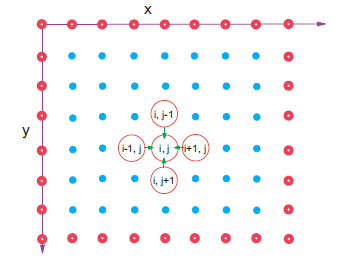
</div>

### Método de relajación (de Jacobi)

<div>

</div>

- Para obtener una solución razonable a partir de lo anterior, se pueden suponer valores iniciales para el potencial en cada punto $V(i,j)$ de la malla discretizada y aplicar dicha ecuación iterativamente para mejorar los valores iniciales
$$
V_{nuevo}(i,j) = \frac{1}{4}\Bigl [ V_{viejo}(i+1,j)+V_{viejo}(i-1,j)+V_{viejo}(i,j+1)+V_{viejo}(i,j-1)\Bigr]
$$
- Las iteraciones se realizan hasta que los resultados cumplan cierto criterio de convergencia.
- Si se logra convergencia se dice que la suposición inicial se relajó hacia la solución.
- No siempre es posible encontrar convergencia o que el proceso sea suficientemente rápido para que sea útil.
- En general el método de relajación convierte una EDP _independiente del tiempo_ en una EDP _dependiente del tiempo_ cuya solución evoluciona temporalmente acorde con el proceso de relajación. Consulte Giordano p131 para una discusión detallada.
- Otros métodos de relajación como el método Gauss-Seidel utilizan los valores actualizados del potencial conforme se van calculando.

### Relajación y sobrerelajación (Landau $\S$ 17.4.1)

* El método de Jacobi puede modificarse para que use valores nuevos del potencial conforme se hacen disponibles (método Gauss-Seidel). Por ejemplo:
$$
V_{nuevo}(i,j) = \frac{1}{4}\Bigl [ V_{viejo}(i+1,j)+V_{nuevo}(i-1,j)+V_{viejo}(i,j+1)+V_{nuevo}(i,j-1)\Bigr]
$$

* Esta modificación no mejora demasiado la tasa de convergencia. Sin embargo, puede usarse para proponer otras modificaciones como por ejemplo el método de sobre-relajación simultánea (SOR por sus siglas en inglés). Se define

$$
\Delta V(i,j) = V_{nuevo}(i,j) - V_{viejo}(i,j)
$$

Donde $V_{nuevo}(i,j)$ se calcula usando el método Gauss-Seidel.

Ahora se calcula la aproximación de $V(i,j)$ como:

$$
V_{nuevo}(i,j) = \alpha \Delta V(i,j) + V_{viejo}(i,j)  
$$

Donde el parámetro $\alpha$ determina la sobrerelajación del método. En general el método funciona bien para $1 <\alpha < 2$

### Ejemplo: Potencial en una placa cuadrada por diferencias finitas

In [1]:
# Interactividad con la presentación gráfica
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
 
import numpy as np
import matplotlib.pyplot as plt

from potencial_difs_finitas import Grafico_interactivo

y=interactive(Grafico_interactivo, lado=widgets.IntSlider(min=5.0, max=10.0, step=1.0, value=5, description='L (m):'),
              potencial=widgets.IntSlider(min=25.0, max=150.0, step=25.0, value=25.0, description='U0 (V):'),
              niter=widgets.IntSlider(min=10, max=310, step=20, value=50, description='Iteraciones:'))
display(y)

interactive(children=(IntSlider(value=5, description='L (m):', max=10, min=5), IntSlider(value=25, description…

## Potencial eléctrico y campo: La ecuación de Poisson (Giordano $\S$ 5.2)

En regiones del espacio que sí contienen carga eléctrica, 
el potencial eléctrico $V(x,y,z)$ obedece la ecuación de Poisson:
    
$$
\nabla^2 \cdot V = -\frac{\rho}{\epsilon_0}    
$$

o de forma explícita:

$$
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = -\frac{\rho}{\epsilon_0} 
$$



## Referencias

* Giordano, N.; Nakanishi, H. (2006). _Computational Physics, 2ª ed_. Estados Unidos: Pearson Education
* Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). _A Survey of Computational Physics: Introductory Computational Science_. Princeton: Princeton University Press.
* Reitz J. (1996); _Fundamentos de la teoría electromagnética, 4ta ed_.